<a href="https://colab.research.google.com/github/fersantos-arch/numero-secreto/blob/main/projeto_data_science_(entrega).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)
loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


{'loja': 1534509.12, 'loja2': 1488459.06, 'loja3': 1464025.03, 'loja4': 1384497.58}


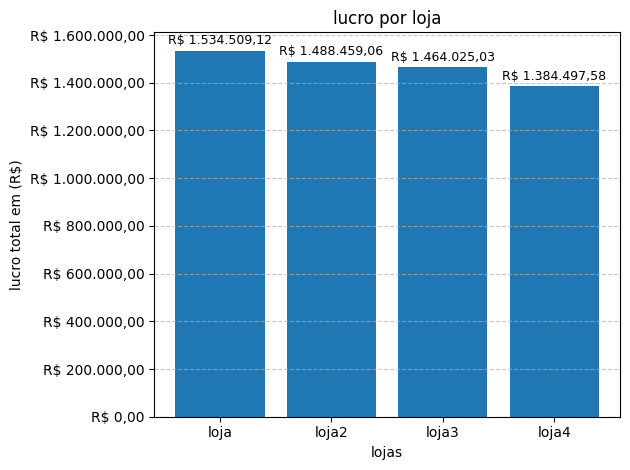

In [ ]:
lojas = [loja, loja2, loja3, loja4]
lojasId = ['loja', 'loja2', 'loja3', 'loja4']
lucro = {chave: float(loja["Preço"].sum()) for chave, loja in zip(lojasId, lojas)}
print(lucro)
bars = plt.bar(x=lucro.keys(), height=lucro.values())
plt.xlabel("lojas")
plt.ylabel("lucro total em (R$)")
plt.title("lucro por loja")

plt.grid(axis='y', linestyle='--', alpha=0.7)

formatter = ticker.FuncFormatter(lambda x, _: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
plt.gca().yaxis.set_major_formatter(formatter)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,  yval + (yval * 0.01), formatter(yval, None),  ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


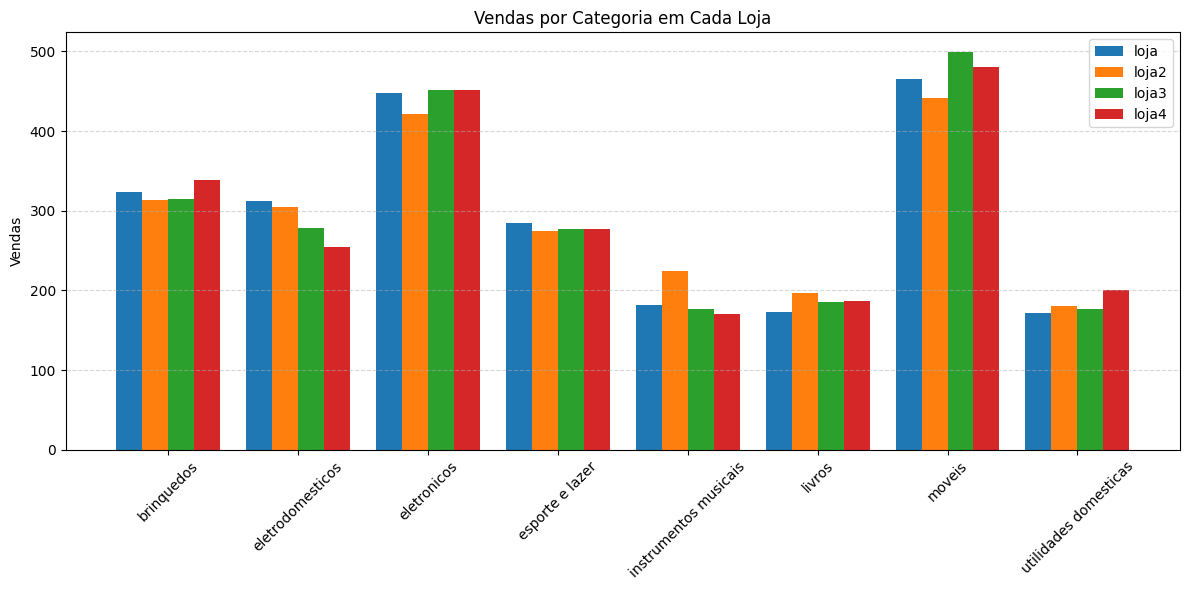

In [ ]:
#criando um dict de loja = ['categorias] usada para retorna as categoiras de cada loja o acesso se dar atraves do categorias['categoria de prodto'].unique isso faz com que seja devoldio as categorias de cada loja sem repetição
categorias = {
    chave: list(categoria['Categoria do Produto'].unique())
    for chave, categoria in zip(lojasId, lojas)
}
# print(categorias)

categoriasFinais = set(cat for lista in categorias.values() for cat in lista) # o set é uma lista que não permite duplicações ao entrarmos com cat for list in categorias for cat in list .values ,
#estamos retornando para o computador o seguinte , acesse cada valor do dicionario categoria , agora percorra cada item das listas retornadas é adicone a set

# tabelaCompleta = pd.concat([loja, loja2, loja3, loja4]) caso a analise se refira a totalidade vendida as duas linhas abaixo irão fazer o filtro de vendas

# vendasPorCategoria = tabelaCompleta.groupby('Categoria do Produto')['Produto'].count().to_dict()

# caso a analise deva ser feita por loja
vendasDeProdutosPorLoja = {
    chave: valor.groupby('Categoria do Produto')['Produto'].count().to_dict()
    for chave, valor in zip(lojasId, lojas)
} #cria um novo  dict que coloca em cada loja um dicionario que relaciona as categorias com quanto foi vendido estilo loja: {brinquedos : 540 } isso é feito a partir do groupby que agrupa os elementos por categoria
# a clausula valor que recebe loja , é devolve a relação de categoria de produtos com produtos em forma de dicionario
num_categorias = len(categoriasFinais)
num_lojas = len(vendasDeProdutosPorLoja)
#extrai a quantidade de categorias e lojas para mapeamento
x = np.arange(num_categorias)
bar_width = 0.8 / num_lojas  # ajuste para encaixar todas as barras
#ajusta grossura das barras

plt.figure(figsize=(12, 6))
#cria a figura

#ordenando as categorias para manter a consistencia
categoriasOrdenadas = sorted(categoriasFinais)

#cria um enumerate na estrutura (i,(Dados))
for i, (loja, vendas) in enumerate(vendasDeProdutosPorLoja.items()):
    valores = [vendas.get(c, 0) for c in categoriasOrdenadas]
    plt.bar(x + i * bar_width, valores, width=bar_width, label=loja)
#ajusta o eixo x , ao passar para valores , o vendas.get(c,0) que é pegar as vendas da cetgoria c no campo 0 ,
#o  plt termina  de confugirar a barra
# Personalizações (posição do nome em barra)
plt.xticks(x + bar_width * (num_lojas - 1) / 2, categoriasOrdenadas, rotation=45)
plt.ylabel('Vendas')
plt.title('Vendas por Categoria em Cada Loja')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

# print(vendasPorCategoria)
# print(vendasDeProdutosPorLoja)








# 3. Média de Avaliação das Lojas

{'loja': 3.98, 'loja2': 4.04, 'loja3': 4.05, 'loja4': 4.0}


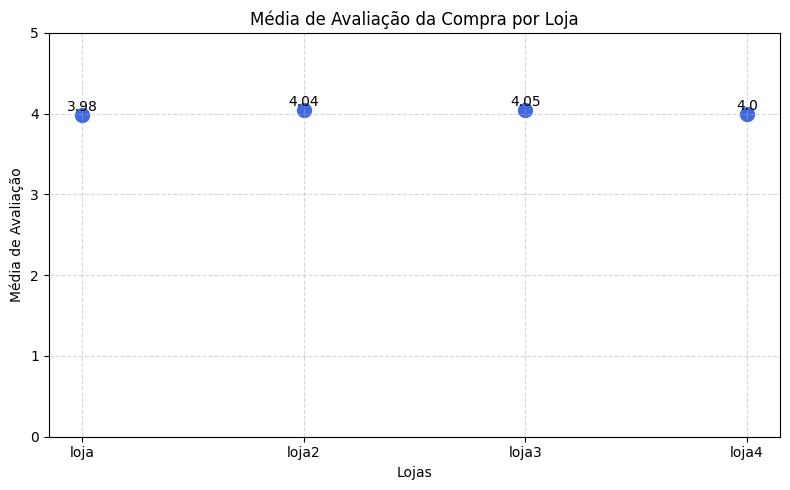

In [ ]:
AvaliacaoPorLoja = {
    chave: round(float(loja["Avaliação da compra"].sum()) / float(loja["Avaliação da compra"].count()),2)
    for chave, loja in zip(lojasId, lojas)
}
print(AvaliacaoPorLoja)
lojasAv = list(AvaliacaoPorLoja.keys())
avaliacoes = list(AvaliacaoPorLoja.values())


plt.figure(figsize=(8, 5))
plt.scatter(lojasAv, avaliacoes, color='royalblue', s=100)

s
plt.title('Média de Avaliação da Compra por Loja')
plt.xlabel('Lojas')
plt.ylabel('Média de Avaliação')
plt.ylim(0, 5)
plt.grid(True, linestyle='--', alpha=0.5)

for i, txt in enumerate(avaliacoes):
    plt.text(lojasAv[i], avaliacoes[i] + 0.05, str(txt), ha='center')

plt.tight_layout()
plt.show()

  # 4. Produtos Mais e Menos Vendidos

loja
loja2
loja3
loja4


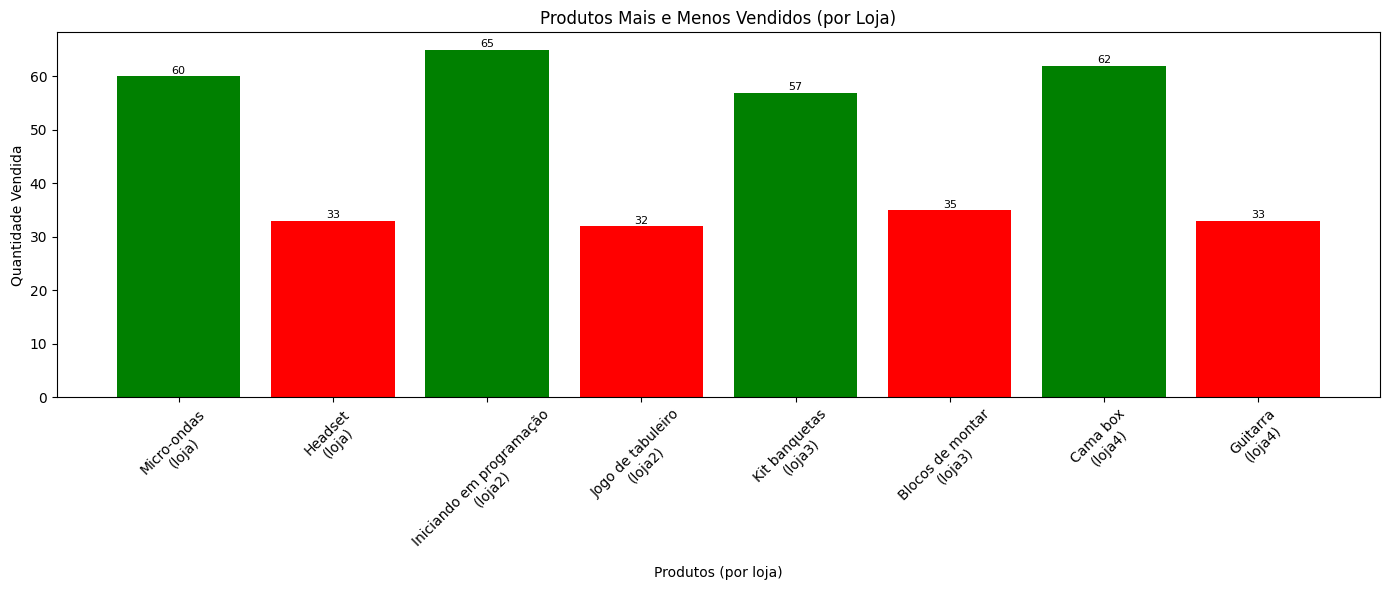

In [ ]:
MaiseMenosVendidos = {
    chave: {
        'max': {lojaV['Produto'].value_counts().idxmax(): int(lojaV['Produto'].value_counts().max())},
        'min': {lojaV['Produto'].value_counts().idxmin(): int(lojaV['Produto'].value_counts().min())}
    }
    for chave, lojaV in zip(lojasId, lojas)
}
MaiseMenosVendidos = {
    chave: {
        'max': {lojaV['Produto'].value_counts().idxmax(): int(lojaV['Produto'].value_counts().max())},
        'min': {lojaV['Produto'].value_counts().idxmin(): int(lojaV['Produto'].value_counts().min())}
    }
    for chave, lojaV in zip(lojasId, lojas)
}

nomesProdutos = []
quantidades = []
cores = []

for loja in MaiseMenosVendidos:
    # print(loja)
    prod_max = list(MaiseMenosVendidos[loja]['max'].keys())[0]
    qnt_max = list(MaiseMenosVendidos[loja]['max'].values())[0]

    prod_min = list(MaiseMenosVendidos[loja]['min'].keys())[0]
    qnt_min = list(MaiseMenosVendidos[loja]['min'].values())[0]

    nomesProdutos.append(f'{prod_max}\n({loja})')
    quantidades.append(qnt_max)
    cores.append('green')

    nomesProdutos.append(f'{prod_min}\n({loja})')
    quantidades.append(qnt_min)
    cores.append('red')

fig, ax = plt.subplots(figsize=(14, 6))
barras = ax.bar(nomesProdutos, quantidades, color=cores)

ax.set_xlabel('Produtos (por loja)')
ax.set_ylabel('Quantidade Vendida')
ax.set_title('Produtos Mais e Menos Vendidos (por Loja)')
ax.tick_params(axis='x', rotation=45)

for barra in barras:
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, altura + 0.5, str(altura), ha='center', fontsize=8)

plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


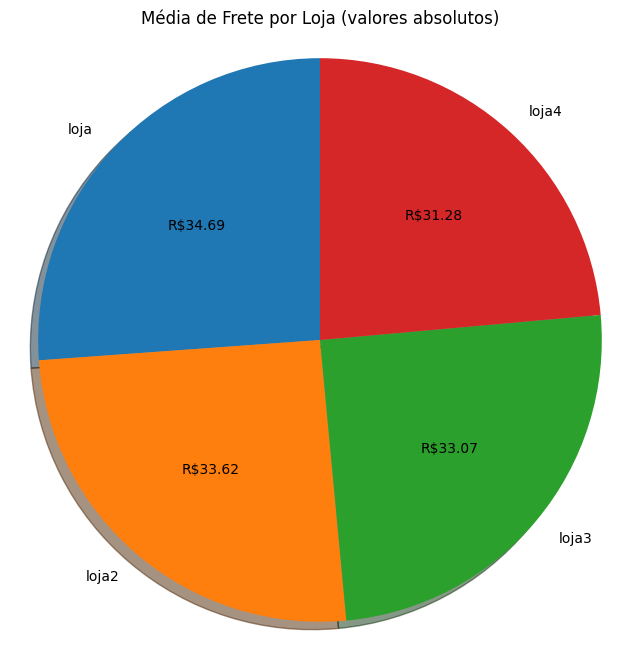

In [ ]:
FretePorLoja = {
    chave: round(float(loja["Frete"].sum()) / float(loja["Frete"].count()),2) for chave ,loja in zip(lojasId, lojas)
}

# print(FretePorLoja)

labels = list(FretePorLoja.keys())
valores = list(FretePorLoja.values())

def valor_absoluto(pct, todos_valores):
    total = sum(todos_valores)
    valor = pct * total / 100
    return f'R${valor:.2f}'

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(valores, labels=labels, autopct=lambda pct: valor_absoluto(pct, valores), startangle=90, shadow=True)

ax.set_title('Média de Frete por Loja (valores absolutos)')
ax.axis('equal')

plt.show()

## Relatorio

 Análise e Justificativa da Recomendação

A metodologia aplicada baseia-se em uma avaliação simples, considerando apenas dois critérios principais: lucros absolutos e média de avaliação de cada loja. Essa abordagem fornece uma visão inicial útil, porém limitada.

Contudo, não foi realizada uma análise mais aprofundada de variáveis que impactam diretamente o desempenho de uma loja, como:

Perfil e tipo de produtos mais vendidos

Tendência de procura ou sazonalidade de vendas

Demanda regional ou segmentada

Modelo de cobrança do frete (empresa ou consumidor)

Esses dados são fundamentais para uma avaliação estratégica de longo prazo, pois permitem prever potencial de crescimento, sustentabilidade das vendas e rentabilidade futura. Sem essas informações, a análise fica restrita ao momento atual, impossibilitando inferências sólidas sobre o desempenho futuro de cada unidade.

Além disso, o período de arrecadação dos lucros não foi considerado — não sabemos se os valores registrados se referem a um mês, trimestre ou ano. Essa ausência impede o cálculo de uma média de faturamento por tempo, o que seria decisivo para uma comparação justa entre as lojas.

Exemplo: Uma loja que lucra R$ 1.000.000 em 1 mês é mais eficiente do que uma que lucra o mesmo valor em 6 meses — esse tipo de análise só seria possível com dados temporais.

Portanto, a recomendação será feita com base apenas nos valores absolutos informados.

Avaliação por Loja
Loja 1
Avaliação: 3.98 de 5

Lucro: R$ 1.534.509,12

Apesar de possuir a pior média de avaliação, é a mais lucrativa, com uma margem de R$ 46.050,06 a mais em relação à segunda loja mais rentável.
Essa diferença financeira acaba minimizando o impacto negativo da nota de avaliação, que é apenas 0,7 ponto inferior à loja mais bem avaliada.

Mesmo que sua avaliação seja relativamente baixa, os resultados financeiros compensam, dentro do escopo atual da análise.

Lojas 2 e 3
Ambas têm lucros e avaliações muito próximos, tornando irrelevante qualquer pequena vantagem de uma sobre a outra, seja em lucro ou em reputação.

Loja 4
Lucro mais baixo e segunda pior avaliação.
É a menos vantajosa sob os critérios atuais, sendo a candidata ideal para venda ou descontinuação.

Vale destacar que, sem o dado temporal, não se pode descartar a hipótese de um lucro proporcionalmente alto em menos tempo, mas essa avaliação extrapola o escopo atual.

Conclusão
Com base nos dados disponíveis (lucro total e média de avaliação), a Loja 4 é a menos eficiente e, portanto, a mais indicada para desinvestimento ou venda.

Caso fossem incluídas informações sobre período de vendas, ticket médio, volume de pedidos, e perfil de produto, uma nova análise mais precisa e estratégica poderia ser realizada, considerando indicadores de desempenho contínuo e potencial de crescimento.

